In [ ]:
from json import load

with open("keys.json") as f:
    keys = load(f)

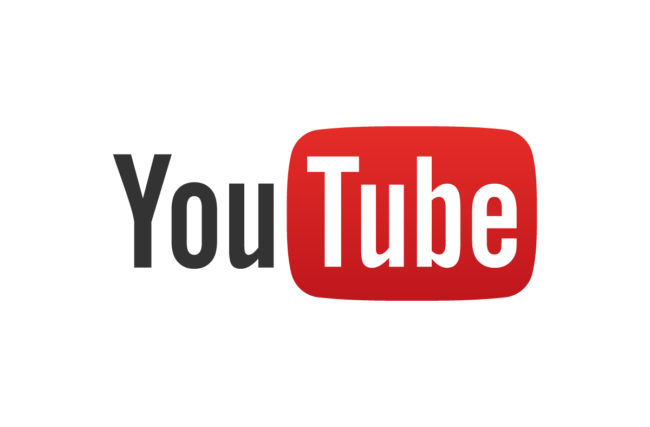

In [ ]:
from googleapiclient.discovery import build

api = build("youtube", "v3", developerKey = keys["youtube"]["developerKey"])

In [ ]:
response = api.search().list(q="The Developers Conference", part="snippet", type="channel").execute()

response

In [ ]:
channel_id = response["items"][0]["id"]["channelId"]

channel_id

In [ ]:
response = api.channels().list(id=channel_id, part="contentDetails").execute()

videos_id = response["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]

videos_id

In [ ]:
response = api.playlistItems().list(  
                                      playlistId=videos_id
                                    , part="snippet"
                                    , maxResults=50
                                    , pageToken=None
                                    ).execute()
videos = response["items"]

In [ ]:
totalViews = 0
totalLikes = 0

for v in videos:
    video_id = v["snippet"]["resourceId"]["videoId"]
    response = api.videos().list(id=video_id, part="statistics").execute()
    data = response["items"][0]["statistics"]
    totalViews += int(data["viewCount"])
    totalLikes += int(data["likeCount"])
    
percentualLikes = (totalLikes / totalViews) * 100
    
print(f"O percentual de likes nos vídeos do TDC é de {'%.2f' % percentualLikes}%")

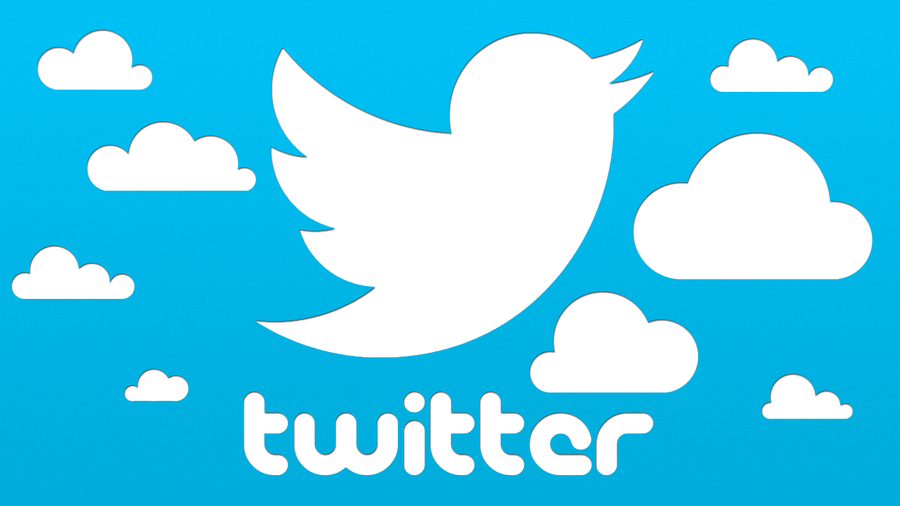

In [ ]:
from tweepy import OAuthHandler, API

auth = OAuthHandler(
              consumer_key = keys["twitter"]["consumer_key"]
            , consumer_secret = keys["twitter"]["consumer_secret"]
)

auth.set_access_token(
              key = keys["twitter"]["access_token"],
              secret = keys["twitter"]["access_token_secret"]
)
api = API(auth)

In [ ]:
api.me()

In [ ]:
tweets = api.search(q = "#tdcinnovation", lang = "pt", count = 200)

tdc_tweets = {}
for each in tweets:
    tdc_tweets[each._json["user"]["name"]] = (each._json["text"], each._json["id"])
    
tdc_tweets

In [ ]:
for user, rt in tdc_tweets.items():
    try:
        api.retweet(id = rt[1])
        print(f"Dei RT no tweet do(a) {user}")
    except:
        print(f"Ops! Não foi possível dar RT no tweet do(a) {user}")

In [ ]:
api.update_status("Acabei de dar RT nos tweets de: " + " ,".join(tdc_tweets.keys()))